<a href="https://colab.research.google.com/github/ManelSoengas/tutorials/blob/main/Deep_learning_CNN_2_beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inroducción



Carga de librerias

In [2]:
!pip install tensorflow


In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

import matplotlib.pyplot as plt

#from keras.layers.convolutional import Conv2D, MaxPooling2D
#from keras.utils import np_utils

Carga del conjunto de datos

In [10]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Visualización de muestras del conjunto de datos

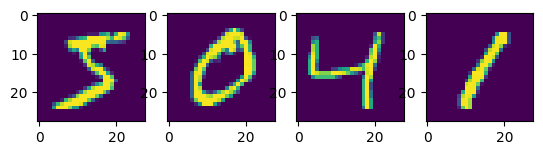

In [11]:
# plot 4 images as gray scale
plt.subplot(141)
plt.imshow(X_train[0])
plt.subplot(142)
plt.imshow(X_train[1])
plt.subplot(143)
plt.imshow(X_train[2])
plt.subplot(144)
plt.imshow(X_train[3])
plt.show()

Procesamiento de los datos

In [12]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [13]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Codificación de las etiquetas.

In [15]:
# one hot encode outputs
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)
#num_classes = y_test.shape[1]

# Codificar las salidas en formato one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

Creación del modelo

In [16]:
# Create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilar el modelo

In [17]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Entrenar el modelo

In [18]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8525 - loss: 0.5029 - val_accuracy: 0.9765 - val_loss: 0.0782
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9754 - loss: 0.0811 - val_accuracy: 0.9829 - val_loss: 0.0541
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9843 - loss: 0.0520 - val_accuracy: 0.9854 - val_loss: 0.0430
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9884 - loss: 0.0384 - val_accuracy: 0.9880 - val_loss: 0.0401
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9894 - loss: 0.0337 - val_accuracy: 0.9888 - val_loss: 0.0332
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9924 - loss: 0.0242 - val_accuracy: 0.9871 - val_loss: 0.0382
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9928 - loss: 0.0218 - val_accuracy: 0.9892 - val_loss: 0.0347
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9935 - loss: 0.0190 - val_accuracy: 0.

Evaluar el modelo

In [19]:
# Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.08%


Faltan gráficas de evolución de las pérdidas en el modelo.
Otro sistema para evaluar el modelo con el conjunto de test.
Una inteface para cargar imégenes de números.
Explicar los pasos.